In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

D:\download\conda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yashdahekar/Insurance_Premium_Prediction/main/notebooks/data/insurance.csv")
df.sample(10)

,age,sex,bmi,children,smoker,region,expenses
1322,62,male,38.8,0,no,southeast,12981.35
891,36,female,29.0,4,no,southeast,7243.81
1030,46,female,23.7,1,yes,northwest,21677.28
591,47,male,19.6,1,no,northwest,8428.07
377,24,male,40.2,0,yes,southeast,38126.25
150,35,male,24.1,1,no,northwest,5125.22
131,61,female,22.0,0,no,northeast,13616.36
695,26,female,40.2,0,no,northwest,3201.25
1208,37,female,25.6,1,yes,northeast,20296.86
336,60,male,25.7,0,no,southeast,12142.58


In [3]:
df.duplicated().sum()

1

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
cat = [feature for feature in df if df[feature].dtypes=="O"]
num = [feature for feature in df if df[feature].dtypes!="O"]

In [6]:
print(cat)
print(num)

['sex', 'smoker', 'region']
['age', 'bmi', 'children', 'expenses']


In [7]:
df[cat].describe().T

,count,unique,top,freq
sex,1337,2,male,675
smoker,1337,2,no,1063
region,1337,4,southeast,364


In [8]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.00,27.00,39.00,51.00,64.00
bmi,1337.0,30.665520,6.100664,16.00,26.30,30.40,34.70,53.10
children,1337.0,1.095737,1.205571,0.00,0.00,1.00,2.00,5.00
expenses,1337.0,13279.121638,12110.359657,1121.87,4746.34,9386.16,16657.72,63770.43


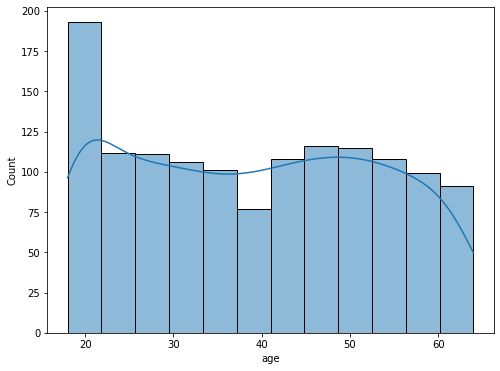

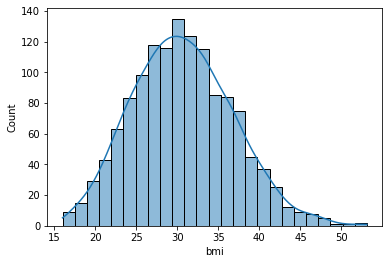

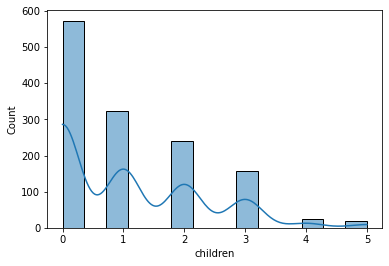

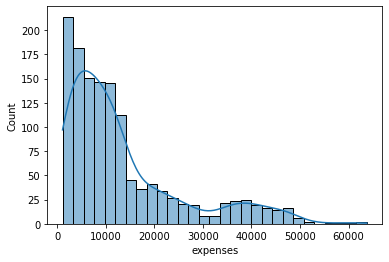

In [9]:
plt.figure(figsize=(8,6))
for i in df[num]:
    sns.histplot(df[i],kde=True)
    print('\n')
    plt.show()

<AxesSubplot:xlabel='sex', ylabel='expenses'>

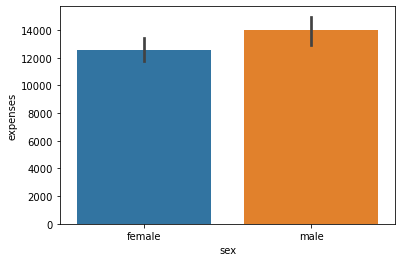

In [10]:
sns.barplot(df['sex'],df['expenses'])

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

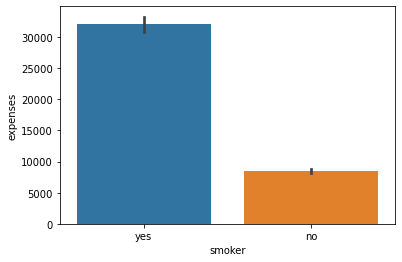

In [11]:
sns.barplot(df['smoker'],df['expenses'])

In [12]:
region_groupby=df.groupby(df['region'])
region_groupby.sum()

,age,bmi,children,expenses
region,,,,
northeast,12723,9453.1,339,4343668.64
northwest,12720,9460.0,373,4034072.37
southeast,14174,12142.8,382,5363689.80
southwest,12823,9943.9,371,4012754.82


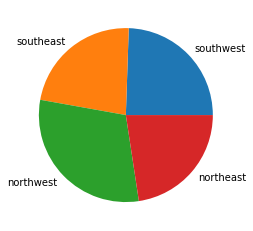

In [13]:
plt.pie(region_groupby['expenses'].sum(),labels= df['region'].unique())
plt.show()

<AxesSubplot:xlabel='children', ylabel='expenses'>

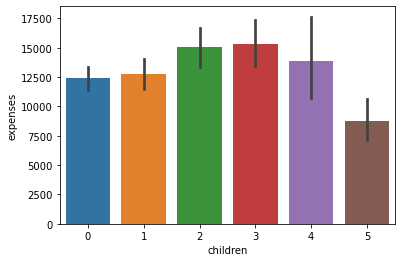

In [14]:
sns.barplot(x=df['children'],y=df['expenses'])

In [23]:
children_groupy = df.groupby('children')
children_groupy.sum()['expenses'].sort_values()

children
5     158148.64
4     346266.42
3    2410785.01
2    3617655.36
1    4124899.67
0    7096430.53
Name: expenses, dtype: float64

In [27]:
age_groupby = df.groupby('age')
age_groupby.sum()['expenses']

age
19    661218.30
52    529431.84
54    525239.30
43    520216.55
64    512061.68
47    511965.99
61    506562.52
60    505526.64
18    488949.04
59    472396.74
63    457354.98
51    454785.41
50    454227.09
37    450497.79
53    448586.05
62    440768.69
45    430075.78
44    428203.72
57    427626.84
48    424342.50
55    420278.17
46    415935.15
56    390663.46
49    355488.17
42    352648.04
23    347754.97
58    346973.20
30    343416.00
27    341171.64
33    321139.84
40    317850.79
36    305111.94
34    301951.74
24    298144.44
20    294631.24
39    294456.09
35    282679.58
29    281614.31
22    280362.12
25    275474.22
31    275318.46
41    260651.13
28    253937.25
32    239727.79
38    202568.32
26    171747.12
21    132453.00
Name: expenses, dtype: float64

<AxesSubplot:xlabel='expenses', ylabel='Count'>

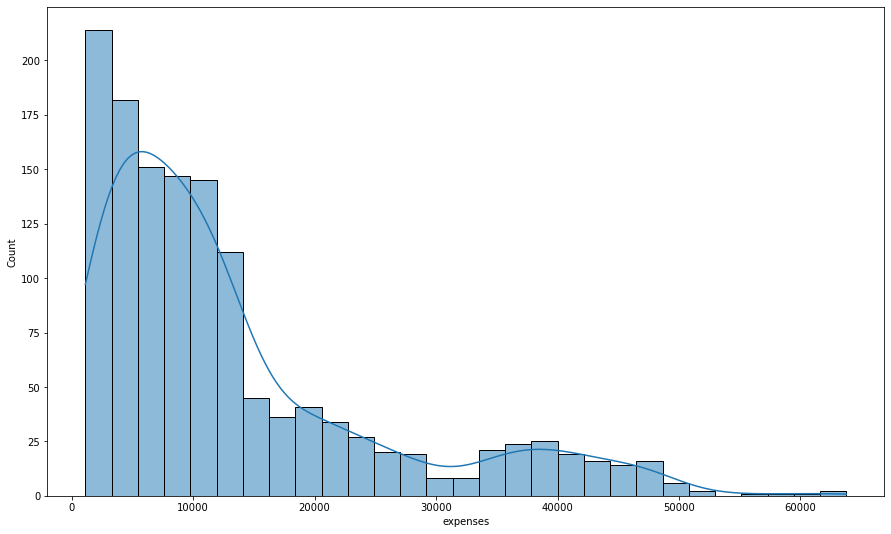

In [68]:
plt.figure(figsize=(15,9))
sns.histplot(x=df['expenses'],kde=True)

<AxesSubplot:xlabel='sex', ylabel='expenses'>

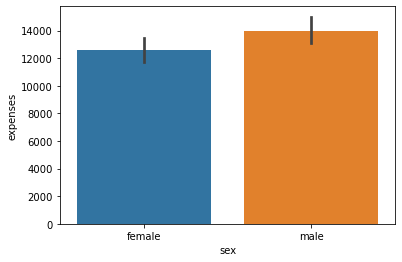

In [106]:
# plt.subplot(2,1,2)
sns.barplot(x=df['sex'],y=df['expenses'])


<AxesSubplot:xlabel='smoker', ylabel='expenses'>

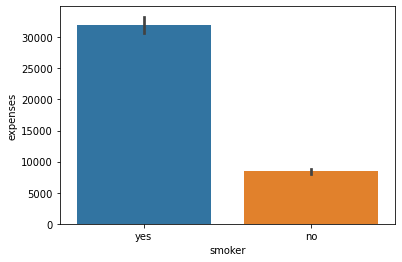

In [107]:
sns.barplot(df['smoker'],df['expenses'])

<AxesSubplot:xlabel='age', ylabel='expenses'>

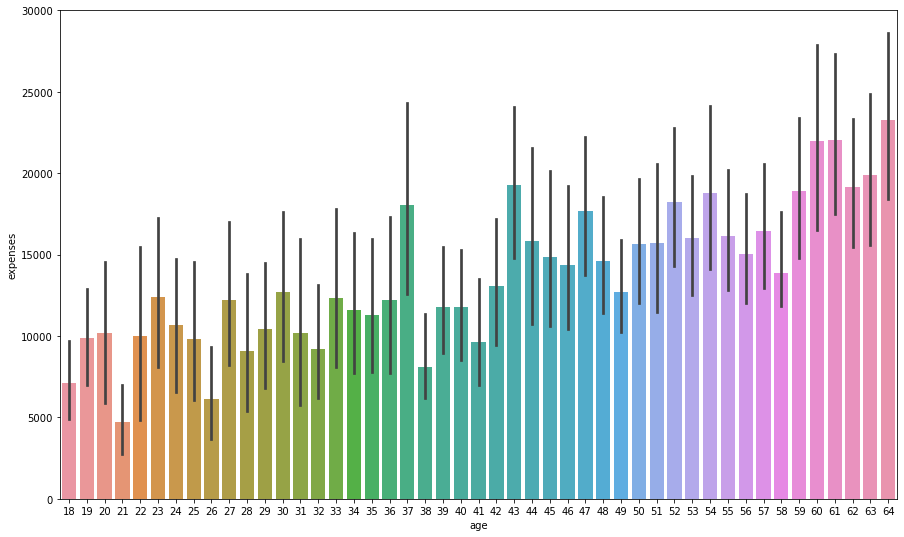

In [66]:
plt.figure(figsize=(15,9))
sns.barplot(x=df['age'],y=df['expenses'])

In [108]:
df[df['sex']=='female']

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
9,60,female,25.8,0,no,northwest,28923.14
...,...,...,...,...,...,...,...
1332,52,female,44.7,3,no,southwest,11411.69
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
